<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/R%20program%20lab13_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 13: Text Mining - Clustering (30 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

## Necessary packages

In [ ]:
# install the XML package
install.packages("XML")

# install text mining package
install.packages("tm")

# install wordcloud package
install.packages("wordcloud")

# install proxy package for cosine distance
install.packages("proxy")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load packages
library(XML)
library(tm)
library(wordcloud)
library(proxy)

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




<br>


---



## Custom Function for Text Mining

Load the `text_miner()` function below. The function has several inputs:
* `text` is the character vector of text your will analyze/mine
* `word.remove` can be a vector of characters of words you would like to remove in addition to the default stop words (e.g., i, me)
* `min.freq` controls the words to include by frequency
* `max.words` is the maximum number of words to include in the wordcloud
* `rot.per` proportion of words with 90 degree rotation
* `scale` controls scaling of wordcloud
* `plot` can be `TRUE` or `FALSE` and controls whether or not to plot a wordcloud

<br>

Output of the function is an unstructured list with wordcounts (`counts`), the term document matrix (`tfidf.matrix`), and a distance matrix (`dist.matrix`).

In [ ]:
text_miner <- function(text, words.remove = NULL, min.freq=2, max.words=100, 
                             rot.per=0.35, scale = c(5, 1), plot = TRUE) {
  
  ######## create corpus ########
  # create document corpus
  words.corpus <- Corpus(VectorSource(text))


  ######## preprocess text ########
  # convert all to lower case
  words.corpus <- tm_map(words.corpus, content_transformer(tolower))
  # remove any punctuation
  words.corpus <- tm_map(words.corpus, removePunctuation)
  # remove numbers
  words.corpus <- tm_map(words.corpus, removeNumbers)
  # remove whitespace
  words.corpus <- tm_map(words.corpus, stripWhitespace)
  # remove common english words
  words.corpus <- tm_map(words.corpus, removeWords, c(stopwords("english"), words.remove))


  ######## document term matrix ########
  # new term document matrix
  tdm <- DocumentTermMatrix(words.corpus)
  tdm.tfidf <- weightTfIdf(tdm)
  tdm.tfidf <- removeSparseTerms(tdm.tfidf, 0.999)


  ######## matrices for output ########
  # term matrix
  tfidf.matrix <- as.matrix(tdm.tfidf)
  # Cosine distance matrix (useful for specific clustering algorithms)
  dist.matrix = proxy::dist(tfidf.matrix, method = "cosine")


  ######## Determine our most common words ########
  wordCounts <- colSums(as.matrix(tdm))
  wordCounts <- sort(wordCounts, decreasing=TRUE)
  cloudFrame <- data.frame(word = names(wordCounts), freq=wordCounts)


  ######## word cloud ########
  if (plot) {
    wordcloud(names(wordCounts), wordCounts, 
              min.freq=min.freq, max.words=max.words, rot.per=rot.per, scale = scale,
              colors=brewer.pal(8, "Dark2"))
  }

  return(list(counts = cloudFrame, 
              tfidf.matrix = tfidf.matrix, 
              dist.matrix = dist.matrix))
}

<br>


---



####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font> (3 points)

In this lab, we will cluster health-themed abstracts from NIH.

1. Load the abstracts located [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/nih_abstracts.csv) as a dataframe named `abstracts`
2. How many abstracts are in the dataset `abstracts`?
3. Print one of the abstracts from the dataset. In a text cell, provide three key words or phrases from the abstract you selected.

In [ ]:
#1.1
abstracts <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/nih_abstracts.csv")

#1.2
nrow(abstracts)

[1] 100

1.2 100 abstracts in dataset.

In [ ]:
#1.3
head(abstracts)

APPLICATION_ID
1 8693991       
2 8693362       
3 8607498       
4 8697008       
5 8725943       
6 8574224       
  ABSTRACT_TEXT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

0.3 development, test, models

<br>

---

<br>






####<font color=red>Task 1</font>  (6 points)

1. Using the `text_miner()` function, create a wordcloud for the `ABSTRACT_TEXT` variable in the `abstracts` dataframe. Store the function output as `words_all`. Use default `text_miner()` settings.

2. Print the first 6 rows of the `counts` dataframe in the `words_all` list. What is the most commonly used word? Explain your answer.

3. Using the `words.remove` option in the `text_miner()` function, include a list of words to remove and plot the wordcloud. You may have to do this several times until you have removed all unimportant words. You can also change the plotting options for better visualization.





Warning message in tm_map.SimpleCorpus(words.corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeWords, c(stopwords("english"), :
“transformation drops documents”


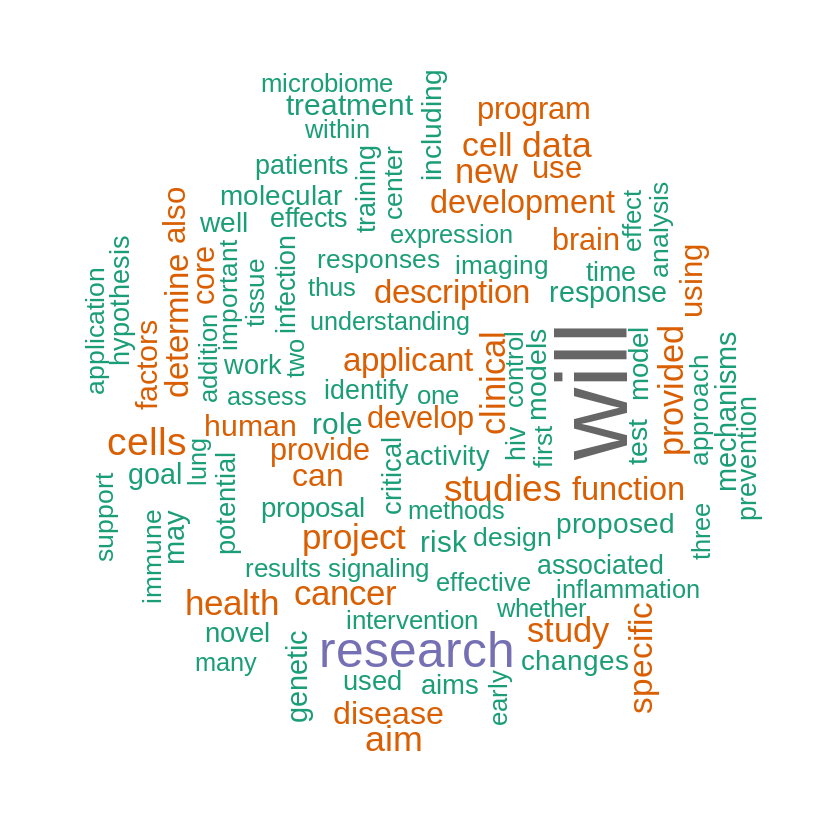

In [ ]:
#1.1
words_all <- text_miner(abstracts$ABSTRACT_TEXT)

In [ ]:
#1.2
head(words_all$counts)

,word,freq
,<chr>,<dbl>
will,will,415
research,research,154
cells,cells,99
studies,studies,88
aim,aim,82
data,data,80


1.2 The frequency of the word "will" is the biggest, so "will" is commonly used.

Warning message in tm_map.SimpleCorpus(words.corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeWords, c(stopwords("english"), :
“transformation drops documents”


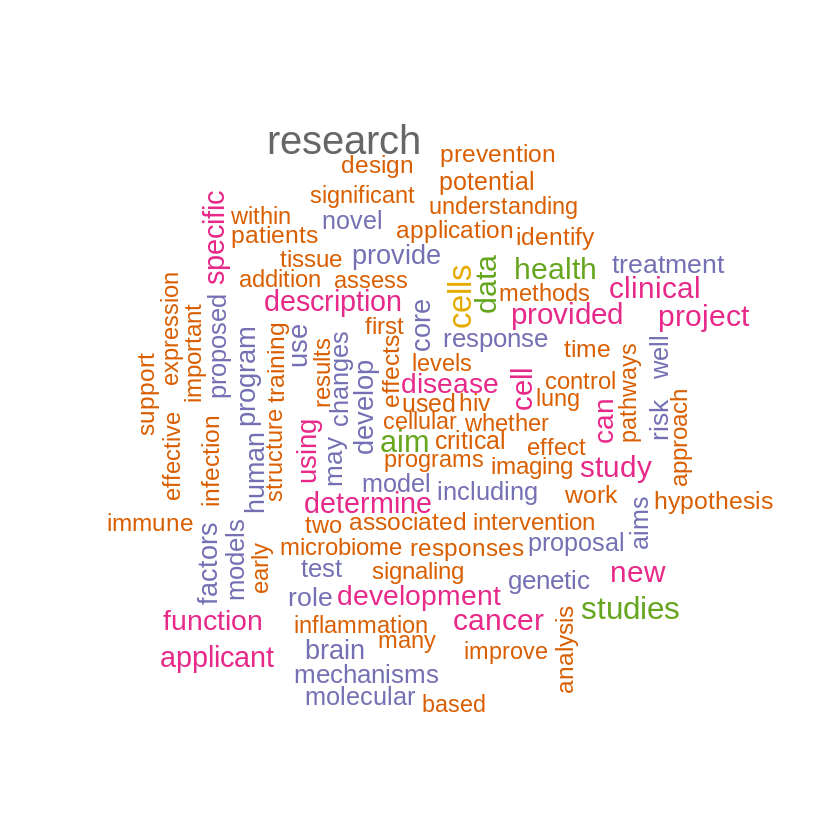

In [ ]:
#1.3
words_all <- text_miner(abstracts$ABSTRACT_TEXT, 
             words.remove = c("center" , "also" , "one", "goal","activity", "will", "three", "thus"), 
             scale = c(2,1))


<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Perform a hierarchical clustering of `dist.matrix` in the `words_all` list. Note: You do not need to use the `dist()` function here; I have done this for you.

2. Plot the dendrogram of the clustering. Overlay red lines to show 10 clusters on the dendrogram using `rect.hclust()`

3. Plot the elbow plot for the clustering. Is there an obvious "elbow" to select the optimal number of clusters?

4. Cut the tree at 10 clusters using the `cutree()` function and store the clusters as `hclusters`. How many abstracts are in each of the 10 clusters?






In [ ]:
#2.1
clust <- hclust(words_all$dist.matrix)


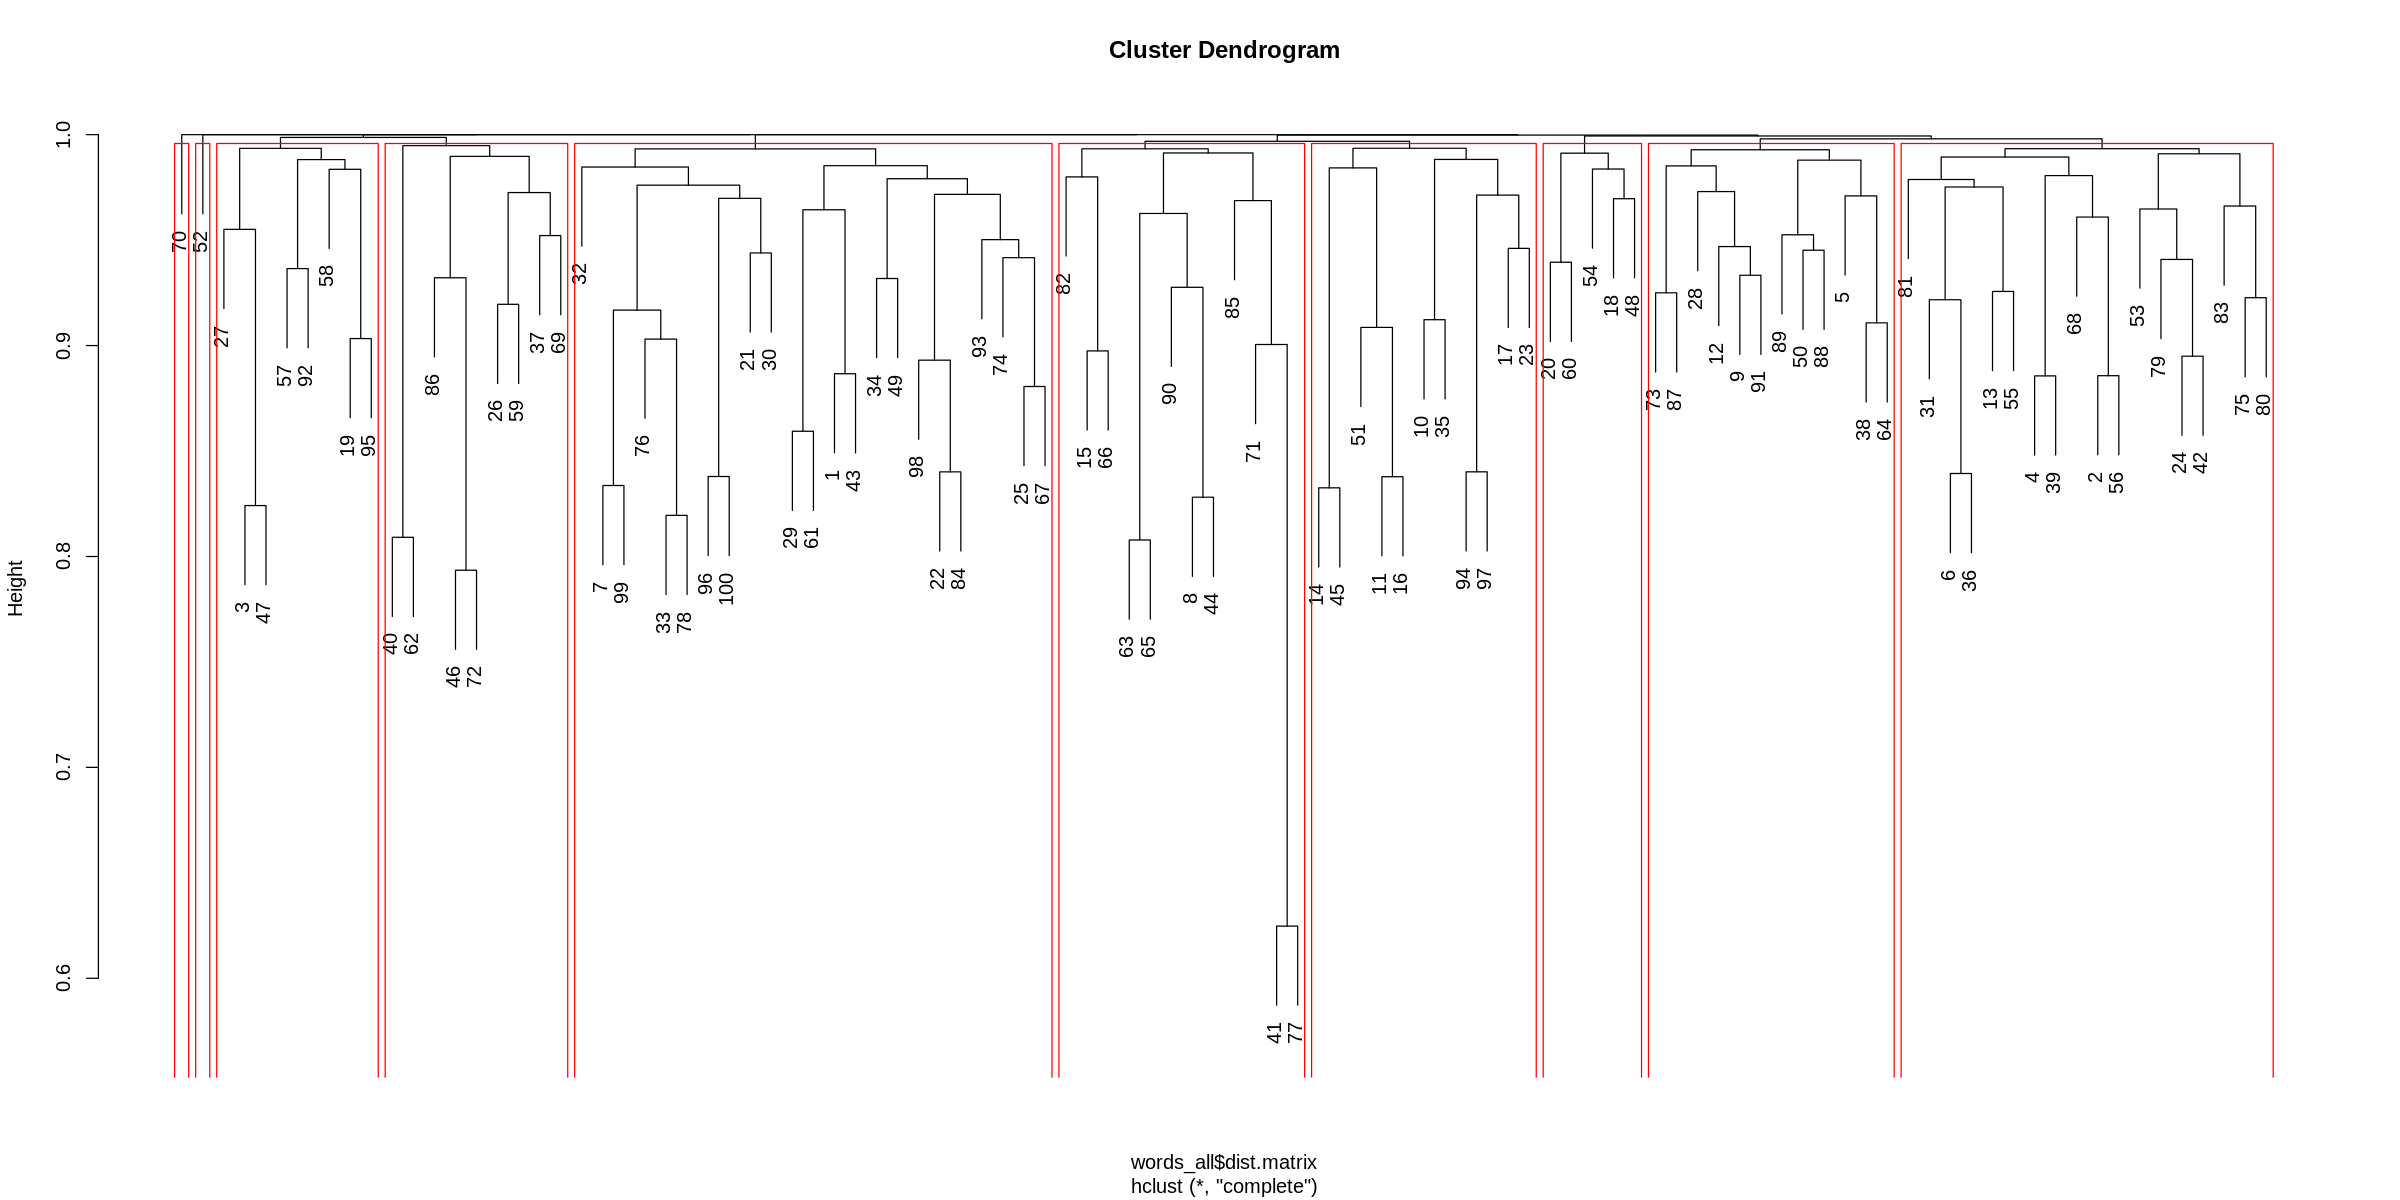

In [ ]:
#2.2
options(repr.plot.width=20, repr.plot.height=10)

plot(clust)

rect.hclust(clust,
            k = 10, 
            border = "red")

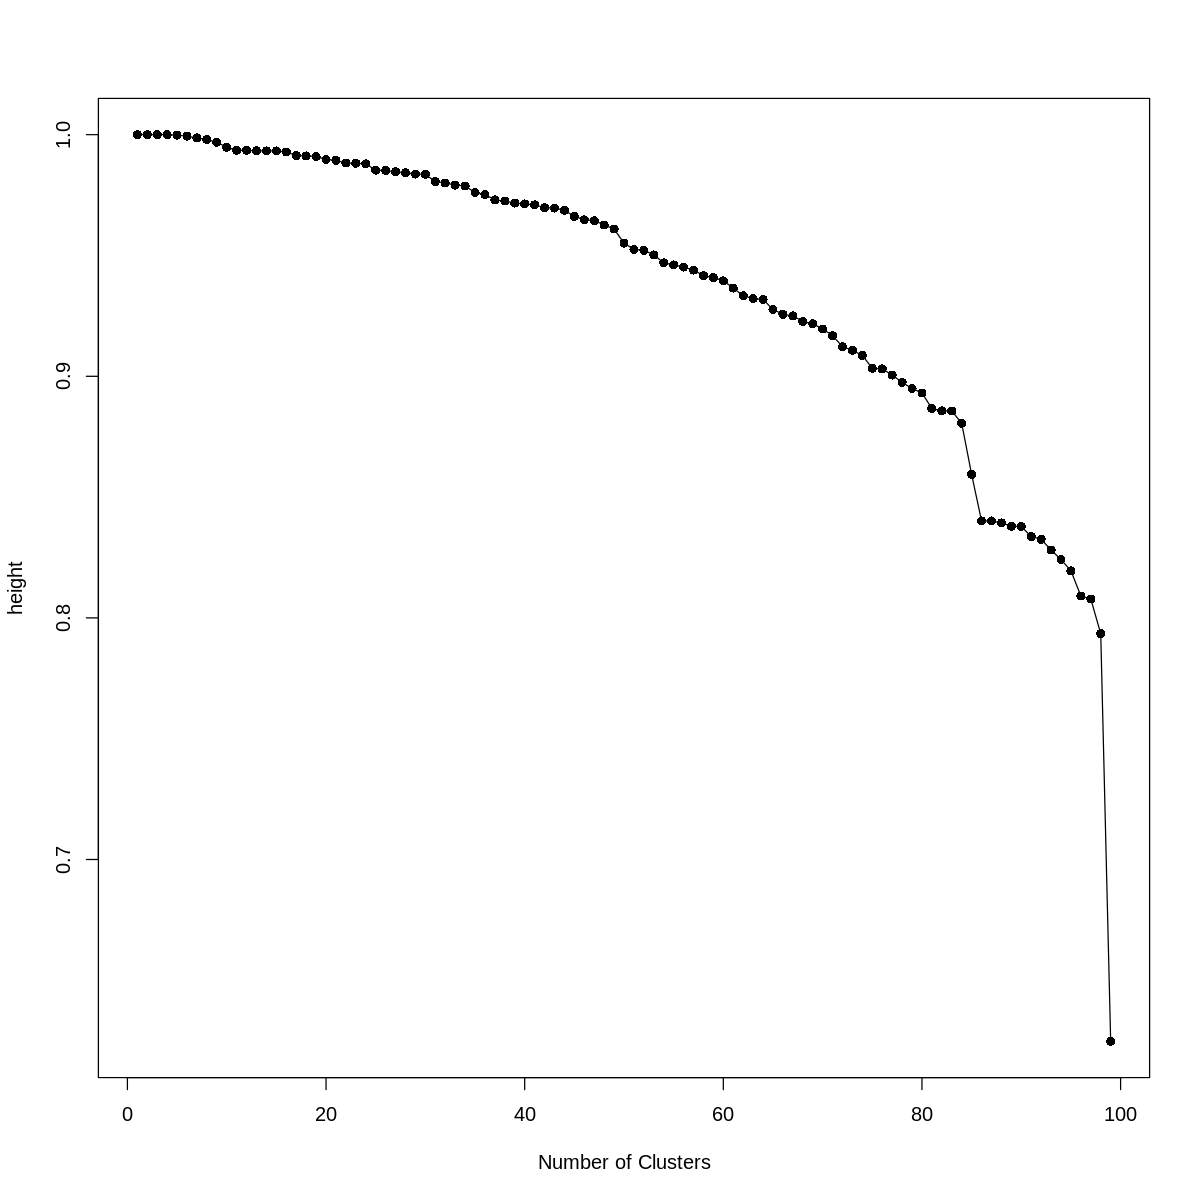

In [ ]:
#2.3

options(repr.plot.width=10, repr.plot.height=10)

plot((nrow(abstracts) - 1):1, clust$height, 
     type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "height"
     )

2.3 No. There is no obvious elbow. 

In [ ]:
#2.4
hclusters <- cutree(clust, k=10)
table(hclusters)

hclusters
 1  2  3  4  5  6  7  8  9 10 
23 18  8 12 12 11  5  9  1  1 

2.4 When we choose clusters as 10, the number of data per cluster is 1.

<br>

---

<br>






####<font color=red>Task 3</font>  (12 points)

1. Create wordcloud for each of the clusters in `hclusters` from Task 2. You should have a total of 10 wordclouds. Remove unimportant words to further clarify cluster meaning.

Hint: Abstracts in cluster 1 can be found using `abstracts$ABSTRACT_TEXT[hclusters == 1]`

2. Interpret the meaning of each cluster based on each of the 10 wordsclouds. Describe these in complete sentences. Your answers may be in the format of a numbered list.








Warning message in tm_map.SimpleCorpus(words.corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(words.corpus, removeWords, c(stopwords("english"), :
“transformation drops documents”


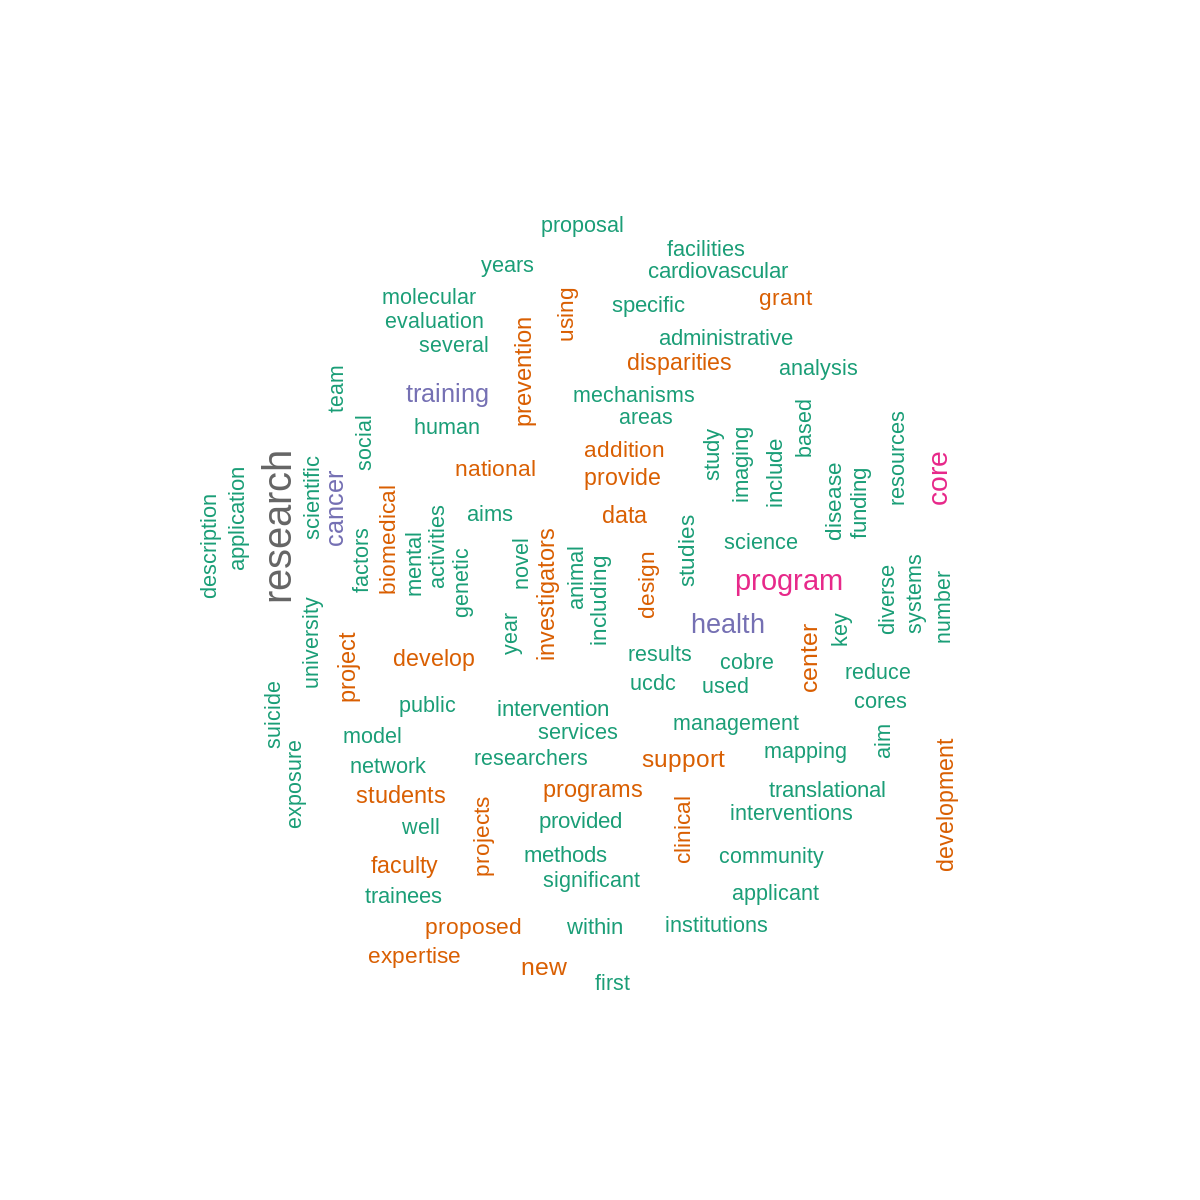

In [ ]:
#3.1
words_cluster <- text_miner(abstracts$ABSTRACT_TEXT [hclusters == 1], 
                words.remove = c("ppg" , "also" , "one", "goal","will", "can", "may", "thus"),
                scale = c(2,1))


In [ ]:
which(hclusters ==9)
abstracts[70,]
which(hclusters == 10)

52 
52

,APPLICATION_ID,ABSTRACT_TEXT
,<int>,<chr>
70,8934588,No abstract provided


70 
70

1. First cluster is about study for the risk.
2. Second cluster is about risk of disease.
3. Third cluster is about experiment of disease since it includes the words relevent experiment.
4. Fourth cluster is for the result of research.
5. Fifth cluster is about the treatment for disease.
6. Sixth cluster is about experiment subject.
7. Seventh cluster is about relevance of cancer,
8. Eighth cluster is about immune studies.
9. Nineth cluster is about experiment with the hypothesis.
10. Tenth cluster is about health training. 